In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.neural_network import MLPRegressor

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/machine.data'
df=pd.read_csv(path, sep=',', header=0, )
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[7],axis=1)
df.columns = ['MYCT', 'MMIN' , 'MMAX','CACH','CHMIN','CHMAX','PRP']
print(df.head())

   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0    29  8000  32000    32      8     32  269
1    29  8000  32000    32      8     32  220
2    29  8000  32000    32      8     32  172
3    29  8000  16000    32      8     16  132
4    26  8000  32000    64      8     32  318


In [ ]:
max = {'MYCT':125, 'MMIN': 256 , 'MMAX': 6000, 'CACH':256.1, 'CHMIN':16, 'CHMAX':128,'PRP':198}
max = pd.Series(data=max, index=['MYCT', 'MMIN' , 'MMAX','CACH','CHMIN','CHMAX','PRP'])
print(max)

MYCT      125.0
MMIN      256.0
MMAX     6000.0
CACH      256.1
CHMIN      16.0
CHMAX     128.0
PRP       198.0
dtype: float64


In [ ]:
df_nimc=df/max
print(df_nimc.head())

    MYCT   MMIN      MMAX      CACH  CHMIN  CHMAX       PRP
0  0.232  31.25  5.333333  0.124951    0.5  0.250  1.358586
1  0.232  31.25  5.333333  0.124951    0.5  0.250  1.111111
2  0.232  31.25  5.333333  0.124951    0.5  0.250  0.868687
3  0.232  31.25  2.666667  0.124951    0.5  0.125  0.666667
4  0.208  31.25  5.333333  0.249902    0.5  0.250  1.606061


In [ ]:
train, test = train_test_split(df_nimc, test_size=0.30, shuffle=True)
print(len(train))
print(len(test))
x_train=train[['MYCT', 'MMIN' , 'MMAX','CACH','CHMIN','CHMAX']]
y_train=train['PRP'].ravel()

x_test=test[['MYCT', 'MMIN' , 'MMAX','CACH','CHMIN','CHMAX']]
y_test=test['PRP'].ravel()


145
63


In [ ]:
reg = MLPRegressor(solver= 'lbfgs',learning_rate='constant',learning_rate_init=0.001 ,hidden_layer_sizes=(30,8,),activation='logistic',random_state=1, max_iter=500, verbose=True)
history=reg.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(x_test[:10])
print(y_test[:10])
print(y_pred[:10])


print('r2',r2)

       MYCT     MMIN      MMAX      CACH   CHMIN     CHMAX
95    0.208  62.5000  5.333333  0.249902  0.5000  0.187500
100   0.920   2.0000  1.000000  0.062476  0.0625  0.046875
172   2.000   2.0000  0.666667  0.000000  0.0625  0.054688
45    6.480   2.0000  0.085333  0.031238  0.0625  0.007812
133   0.400   7.8125  2.666667  0.046857  0.1875  0.125000
168   0.304  15.6250  2.666667  0.499805  1.0000  0.250000
122  12.000   3.0000  0.333333  0.000000  0.0000  0.000000
74    2.400   3.0000  2.000000  0.023428  0.3750  0.187500
117   0.200   7.8125  2.000000  0.031238  0.0625  0.031250
160   0.448   7.8125  1.333333  0.000000  0.0625  0.062500
[2.34848485 0.22727273 0.12626263 0.09090909 0.22727273 1.07070707
 0.09090909 0.25252525 0.24747475 0.12121212]
[1.93469676 0.19551388 0.16561767 0.11058282 0.32921526 1.29494578
 0.10210107 0.26869397 0.19367067 0.14557183]
r2 0.9357127135086702


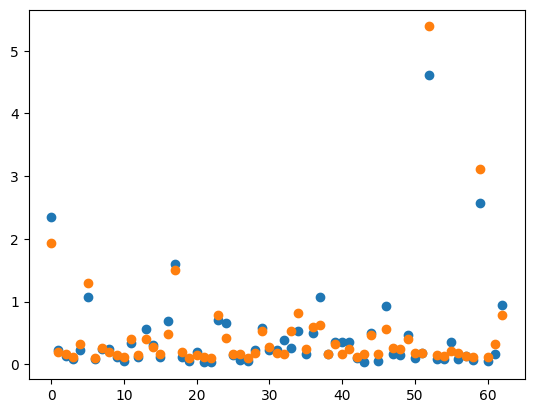

In [ ]:
plt.scatter(range(len(x_test)),y_test)
plt.scatter(range(len(x_test)),y_pred)